<a href="https://colab.research.google.com/github/leakysam/Trend-analysis-scikit-learn/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas seaborn matplotlib scikit-learn

   id league            home_team             away_team            date  \
0   1    Co1      Deportes Tolima  Atlético Bucaramanga  23/2/2024 0:00   
1   2    Cr2         Guadalupe FC             Turrialba  23/2/2024 0:00   
2   3    CLA  Sportivo Trinidense     El Nacional Quito  23/2/2024 1:00   
3   5    BrC          Botafogo PB              Altos/PI  23/2/2024 1:00   
4   6    ArR           Tigre Res.     Boca Juniors Res.  23/2/2024 1:00   

   average_goals  coefficient ft_score ht_score  
0           1.52         1.80    0 - 0  (0 - 0)  
1           3.50         1.36    7 - 0  (1 - 0)  
2           3.50         1.85    1 - 1  (1 - 0)  
3           2.02         1.65    1 - 2  (1 - 0)  
4           1.62         1.44    0 - 0  (0 - 0)  


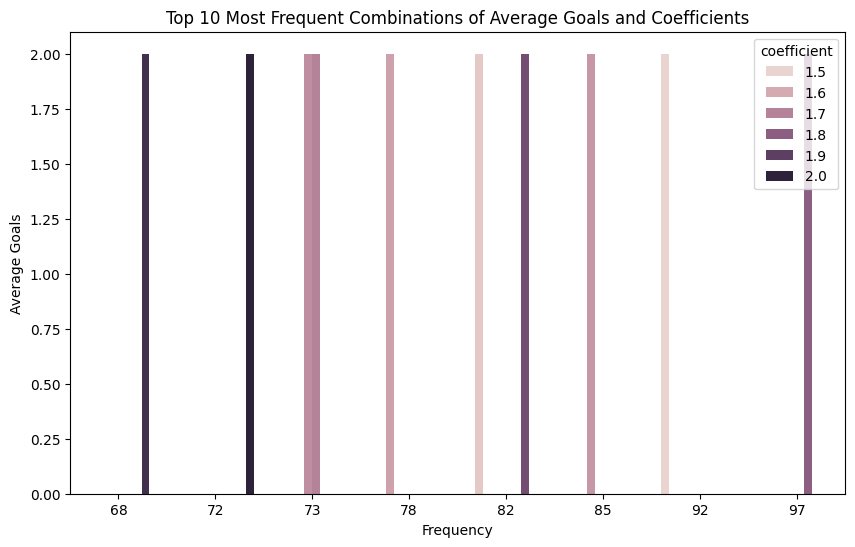

Correlation between Average Goals and Coefficient:
               average_goals  coefficient
average_goals       1.000000    -0.198262
coefficient        -0.198262     1.000000


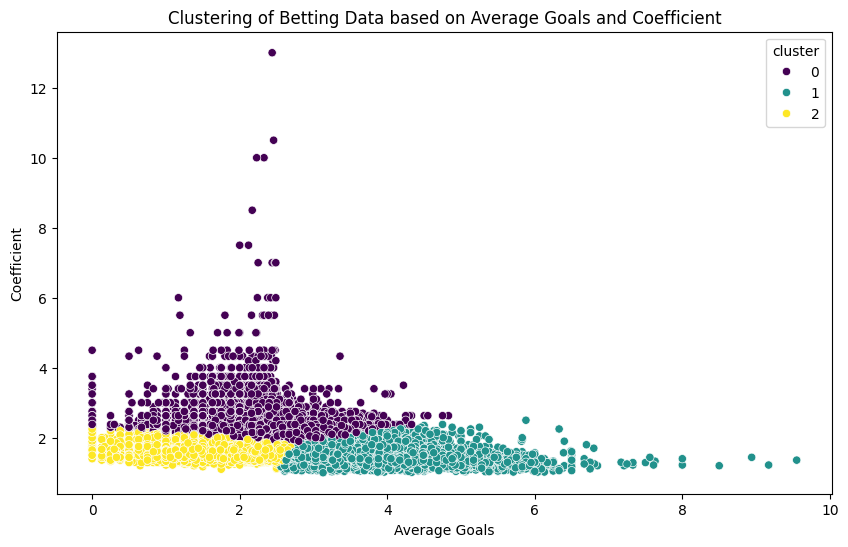

KeyError: 'result'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from collections import Counter

# Step 1: Load the dataset
file_path = '/content/forebet_202411261214.csv'  # Change this to the path of your CSV file
df = pd.read_csv(file_path)

# Step 2: Display the first few rows to understand the data structure
print(df.head())

# Step 3: Clean the data (Handle missing values if necessary)
df.dropna(subset=['average_goals', 'coefficient'], inplace=True)  # Drop rows with missing values in critical columns

# Step 4: Analyze the frequency of average_goals and coefficient combinations
combination_counts = df.groupby(['average_goals', 'coefficient']).size().reset_index(name='count')

# Step 5: Sort by count to find the most frequent combinations
combination_counts_sorted = combination_counts.sort_values(by='count', ascending=False)

# Step 6: Plot the top combinations to visualize the most frequent ones
top_combinations = combination_counts_sorted.head(10)  # Top 10 most frequent combinations
plt.figure(figsize=(10, 6))
sns.barplot(data=top_combinations, x='count', y='average_goals', hue='coefficient', dodge=True)
plt.title('Top 10 Most Frequent Combinations of Average Goals and Coefficients')
plt.xlabel('Frequency')
plt.ylabel('Average Goals')
plt.show()

# Step 7: Calculate correlation between average_goals and coefficient
correlation = df[['average_goals', 'coefficient']].corr()
print('Correlation between Average Goals and Coefficient:')
print(correlation)

# Step 8: Perform KMeans clustering to find potential betting strategies
# Normalize the data for better clustering performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['average_goals', 'coefficient']])

kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters
df['cluster'] = kmeans.fit_predict(df_scaled)

# Step 9: Analyze the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='average_goals', y='coefficient', hue='cluster', palette='viridis')
plt.title('Clustering of Betting Data based on Average Goals and Coefficient')
plt.xlabel('Average Goals')
plt.ylabel('Coefficient')
plt.show()

# Step 10: Calculate the probability of success based on top combinations
# Assuming 'result' is a column indicating the outcome (1 for win, 0 for loss)
top_combination_results = df[df[['average_goals', 'coefficient']].apply(tuple, axis=1).isin(top_combinations[['average_goals', 'coefficient']].apply(tuple, axis=1))]
win_probability = top_combination_results['result'].mean()

print(f"Win Probability for Top Combinations: {win_probability:.2f}")


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
file_path = '/content/forebet_202411261214.csv'  # Change this to the path of your CSV file
df = pd.read_csv(file_path)

# Step 2: Display the first few rows to understand the data structure
print("First few rows of the dataset:")
print(df.head())

# Step 3: Clean the data (Handle missing values if necessary)
df.dropna(subset=['average_goals', 'coefficient'], inplace=True)  # Drop rows with missing values in critical columns

# Step 4: Analyze the frequency of average_goals and coefficient combinations
combination_counts = df.groupby(['average_goals', 'coefficient']).size().reset_index(name='count')

# Step 5: Sort by count to find the most frequent combinations
combination_counts_sorted = combination_counts.sort_values(by='count', ascending=False)

# Step 6: Display the top 10 most frequent combinations
top_combinations = combination_counts_sorted.head(10)  # Top 10 most frequent combinations
print("\nTop 10 Most Frequent Combinations of Average Goals and Coefficients:")
print(top_combinations)

# Step 7: Calculate correlation between average_goals and coefficient
correlation = df[['average_goals', 'coefficient']].corr()
print("\nCorrelation between Average Goals and Coefficient:")
print(correlation)

# Step 8: Perform KMeans clustering to find potential betting strategies
# Normalize the data for better clustering performance
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['average_goals', 'coefficient']])

kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters
df['cluster'] = kmeans.fit_predict(df_scaled)

# Step 9: Display clustering results (show the number of entries in each cluster)
cluster_counts = df['cluster'].value_counts()
print("\nNumber of entries in each cluster:")
print(cluster_counts)

# Step 10: Analyze the win probability based on top combinations
# Assuming 'result' is a column indicating the outcome (1 for win, 0 for loss)
# If 'result' column doesn't exist, you can skip this step or modify based on your dataset's actual column names
if 'result' in df.columns:
    top_combination_results = df[df[['average_goals', 'coefficient']].apply(tuple, axis=1).isin(top_combinations[['average_goals', 'coefficient']].apply(tuple, axis=1))]
    win_probability = top_combination_results['result'].mean()
    print(f"\nWin Probability for Top Combinations: {win_probability:.2f}")
else:
    print("\n'Amount won/lost' or 'result' column not found in the dataset.")


First few rows of the dataset:
   id league            home_team             away_team            date  \
0   1    Co1      Deportes Tolima  Atlético Bucaramanga  23/2/2024 0:00   
1   2    Cr2         Guadalupe FC             Turrialba  23/2/2024 0:00   
2   3    CLA  Sportivo Trinidense     El Nacional Quito  23/2/2024 1:00   
3   5    BrC          Botafogo PB              Altos/PI  23/2/2024 1:00   
4   6    ArR           Tigre Res.     Boca Juniors Res.  23/2/2024 1:00   

   average_goals  coefficient ft_score ht_score  
0           1.52         1.80    0 - 0  (0 - 0)  
1           3.50         1.36    7 - 0  (1 - 0)  
2           3.50         1.85    1 - 1  (1 - 0)  
3           2.02         1.65    1 - 2  (1 - 0)  
4           1.62         1.44    0 - 0  (0 - 0)  

Top 10 Most Frequent Combinations of Average Goals and Coefficients:
      average_goals  coefficient  count
3135            2.0         1.80     97
3125            2.0         1.50     92
3130            2.0         

In [ ]:
import pandas as pd

# Step 1: Load the dataset
file_path = '/content/forebet_202411261214.csv'  # Change this to the path of your CSV file
df = pd.read_csv(file_path)

# Step 2: Display the first few rows to understand the data structure
print("First few rows of the dataset:")
print(df.head())

# Step 3: Clean the data (Handle missing values if necessary)
df.dropna(subset=['average_goals', 'coefficient'], inplace=True)  # Drop rows with missing values in critical columns

# Step 4: Analyze the frequency of average_goals and coefficient combinations
combination_counts = df.groupby(['average_goals', 'coefficient']).size().reset_index(name='count')

# Step 5: Sort by count to find the most frequent combinations
combination_counts_sorted = combination_counts.sort_values(by='count', ascending=False)

# Step 6: Display the count of combinations from top to last
print("\nCombinations of Average Goals and Coefficients (Sorted from Top to Last):")
print(combination_counts_sorted)

# Step 7: Conclusions based on the combination counts
total_combinations = combination_counts_sorted.shape[0]
most_frequent_combination = combination_counts_sorted.iloc[0]
least_frequent_combination = combination_counts_sorted.iloc[-1]
average_occurrence = combination_counts_sorted['count'].mean()

# Draw some conclusions based on the data
conclusions = {
    'total_combinations': total_combinations,
    'most_frequent_combination': most_frequent_combination,
    'least_frequent_combination': least_frequent_combination,
    'average_occurrence': average_occurrence
}

print("\nConclusions based on the combinations analysis:")
print(f"Total unique combinations: {total_combinations}")
print(f"Most frequent combination: Average Goals = {most_frequent_combination['average_goals']}, Coefficient = {most_frequent_combination['coefficient']}, Count = {most_frequent_combination['count']}")
print(f"Least frequent combination: Average Goals = {least_frequent_combination['average_goals']}, Coefficient = {least_frequent_combination['coefficient']}, Count = {least_frequent_combination['count']}")
print(f"Average occurrence of combinations: {average_occurrence:.2f}")

# Step 8: Analyzing betting strategy based on frequency
# If combinations appear frequently, they might represent more stable or predictable trends
high_frequency_threshold = combination_counts_sorted['count'].quantile(0.75)  # Top 25% frequent combinations
high_frequency_combinations = combination_counts_sorted[combination_counts_sorted['count'] >= high_frequency_threshold]

print("\nHigh Frequency Combinations (appeared in the top 25% of the combinations):")
print(high_frequency_combinations)

# Conclusions based on high frequency combinations
if high_frequency_combinations.shape[0] > 0:
    print("\nPossible betting strategy:")
    print("Consider focusing on betting combinations with higher frequencies, as they may represent more consistent patterns in the dataset.")
else:
    print("\nNo high-frequency combinations found.")


First few rows of the dataset:
   id league            home_team             away_team            date  \
0   1    Co1      Deportes Tolima  Atlético Bucaramanga  23/2/2024 0:00   
1   2    Cr2         Guadalupe FC             Turrialba  23/2/2024 0:00   
2   3    CLA  Sportivo Trinidense     El Nacional Quito  23/2/2024 1:00   
3   5    BrC          Botafogo PB              Altos/PI  23/2/2024 1:00   
4   6    ArR           Tigre Res.     Boca Juniors Res.  23/2/2024 1:00   

   average_goals  coefficient ft_score ht_score  
0           1.52         1.80    0 - 0  (0 - 0)  
1           3.50         1.36    7 - 0  (1 - 0)  
2           3.50         1.85    1 - 1  (1 - 0)  
3           2.02         1.65    1 - 2  (1 - 0)  
4           1.62         1.44    0 - 0  (0 - 0)  

Combinations of Average Goals and Coefficients (Sorted from Top to Last):
       average_goals  coefficient  count
3135            2.00         1.80     97
3125            2.00         1.50     92
3130            2.00

In [ ]:
import pandas as pd

# Step 1: Load the dataset
file_path = '/content/forebet_202411261214.csv'  # Change this to the path of your CSV file
df = pd.read_csv(file_path)

# Step 2: Display the first few rows to understand the data structure
print("First few rows of the dataset:")
print(df.head())

# Step 3: Clean the data (Handle missing values if necessary)
df.dropna(subset=['average_goals', 'coefficient'], inplace=True)  # Drop rows with missing values in critical columns

# Step 4: Analyze the frequency of average_goals and coefficient combinations
combination_counts = df.groupby(['average_goals', 'coefficient']).size().reset_index(name='count')

# Step 5: Sort by count to find the most frequent combinations
combination_counts_sorted = combination_counts.sort_values(by='count', ascending=False)

# Step 6: Display the count of combinations from top to last
print("\nCombinations of Average Goals and Coefficients (Sorted from Top to Last):")
print(combination_counts_sorted)

# Step 7: Conclusions based on the combination counts
total_combinations = combination_counts_sorted.shape[0]
most_frequent_combination = combination_counts_sorted.iloc[0]
least_frequent_combination = combination_counts_sorted.iloc[-1]
average_occurrence = combination_counts_sorted['count'].mean()

# Draw some conclusions based on the data
conclusions = {
    'total_combinations': total_combinations,
    'most_frequent_combination': most_frequent_combination,
    'least_frequent_combination': least_frequent_combination,
    'average_occurrence': average_occurrence
}

print("\nConclusions based on the combinations analysis:")
print(f"Total unique combinations: {total_combinations}")
print(f"Most frequent combination: Average Goals = {most_frequent_combination['average_goals']}, Coefficient = {most_frequent_combination['coefficient']}, Count = {most_frequent_combination['count']}")
print(f"Least frequent combination: Average Goals = {least_frequent_combination['average_goals']}, Coefficient = {least_frequent_combination['coefficient']}, Count = {least_frequent_combination['count']}")
print(f"Average occurrence of combinations: {average_occurrence:.2f}")

# Step 8: Analyzing betting strategy based on frequency
# If combinations appear frequently, they might represent more stable or predictable trends
high_frequency_threshold = combination_counts_sorted['count'].quantile(0.75)  # Top 25% frequent combinations
high_frequency_combinations = combination_counts_sorted[combination_counts_sorted['count'] >= high_frequency_threshold]

print("\nHigh Frequency Combinations (appeared in the top 25% of the combinations):")
print(high_frequency_combinations)

# Conclusions based on high frequency combinations
if high_frequency_combinations.shape[0] > 0:
    print("\nPossible betting strategy:")
    print("Consider focusing on betting combinations with higher frequencies, as they may represent more consistent patterns in the dataset.")
else:
    print("\nNo high-frequency combinations found.")

# Step 9: Save the combination counts and related information to an Excel file
output_file_path = '/content/output_combination_results.xlsx'  # Change this to the desired output file path
with pd.ExcelWriter(output_file_path) as writer:
    # Write the combination counts to a sheet
    combination_counts_sorted.to_excel(writer, sheet_name='Combination Counts', index=False)

    # Write the conclusions to a new sheet
    conclusions_df = pd.DataFrame([conclusions])
    conclusions_df.to_excel(writer, sheet_name='Conclusions', index=False)

print(f"\nResults and conclusions have been saved to: {output_file_path}")


First few rows of the dataset:
   id league            home_team             away_team            date  \
0   1    Co1      Deportes Tolima  Atlético Bucaramanga  23/2/2024 0:00   
1   2    Cr2         Guadalupe FC             Turrialba  23/2/2024 0:00   
2   3    CLA  Sportivo Trinidense     El Nacional Quito  23/2/2024 1:00   
3   5    BrC          Botafogo PB              Altos/PI  23/2/2024 1:00   
4   6    ArR           Tigre Res.     Boca Juniors Res.  23/2/2024 1:00   

   average_goals  coefficient ft_score ht_score  
0           1.52         1.80    0 - 0  (0 - 0)  
1           3.50         1.36    7 - 0  (1 - 0)  
2           3.50         1.85    1 - 1  (1 - 0)  
3           2.02         1.65    1 - 2  (1 - 0)  
4           1.62         1.44    0 - 0  (0 - 0)  

Combinations of Average Goals and Coefficients (Sorted from Top to Last):
       average_goals  coefficient  count
3135            2.00         1.80     97
3125            2.00         1.50     92
3130            2.00

In [ ]:
import pandas as pd
from google.colab import files


# After uploading the file, use the file name directly
file_path = '/content/forebet_202411261214.csv'  # Modify this based on your uploaded file name

# Step 2: Load the dataset
df = pd.read_csv(file_path)

# Step 3: Clean the data (Handle missing values if necessary)
df.dropna(subset=['average_goals', 'coefficient', 'ft_score', 'league'], inplace=True)  # Drop rows with missing critical columns

# Step 4: Split the ft_score into home and away goals
df[['home_goals', 'away_goals']] = df['ft_score'].str.split(' - ', expand=True).astype(int)

# Step 5: Calculate the total goals (home_goals + away_goals)
df['total_goals'] = df['home_goals'] + df['away_goals']

# Step 6: Filter the dataset for full-time results (FT) greater than 3 (Over 2.5 goals)
df_over_2_5_goals = df[df['total_goals'] > 3]

# Step 7: Analyze the frequency of average_goals and coefficient combinations where FT > 3
combination_counts_over_2_5 = df_over_2_5_goals.groupby(['average_goals', 'coefficient', 'league']).size().reset_index(name='count')

# Step 8: Sort by count to find the most frequent combinations
combination_counts_sorted_over_2_5 = combination_counts_over_2_5.sort_values(by='count', ascending=False)

# Step 9: Display the count of combinations from top to last
print("\nCombinations of Average Goals and Coefficients (FT > 3):")
print(combination_counts_sorted_over_2_5)

# Step 10: Save the combination counts and related information to an Excel file
output_file_path = '/content/output_combination_results_over_2_5_goals.xlsx'  # Save the file in Colab's environment
with pd.ExcelWriter(output_file_path) as writer:
    # Write the combination counts to a sheet
    combination_counts_sorted_over_2_5.to_excel(writer, sheet_name='Combination Counts FT > 3', index=False)

# Step 11: Download the result file
files.download(output_file_path)  # This will download the Excel file to your computer



Combinations of Average Goals and Coefficients (FT > 3):
       average_goals  coefficient league  count
3438            2.00         1.65    Es5      7
12081           3.00         1.50    De4      6
16639           3.75         1.36    De5      5
13186           3.13         1.44    De4      5
12046           3.00         1.40    De5      4
...              ...          ...    ...    ...
6423            2.33         1.90    Az1      1
6422            2.33         1.85    Us2      1
6421            2.33         1.85    Ma1      1
6419            2.33         1.85    HuC      1
18844           9.17         1.22    CzW      1

[18845 rows x 4 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files


# After uploading the file, use the file name directly
file_path = '/content/forebet_202411261214.csv'  # Modify this based on your uploaded file name

# Step 2: Load the dataset
df = pd.read_csv(file_path)

# Step 3: Clean the data (Handle missing values if necessary)
df.dropna(subset=['average_goals', 'coefficient', 'ft_score', 'ht_score', 'league'], inplace=True)  # Drop rows with missing critical columns

# Step 4: Clean the 'ht_score' column to remove any unwanted characters (e.g., '(')
df['ht_score'] = df['ht_score'].replace(r'\(', '', regex=True)  # Remove '(' character
df['ht_score'] = df['ht_score'].replace(r'\)', '', regex=True)  # Remove ')' character
df['ht_score'] = df['ht_score'].replace(r'\s+', ' ', regex=True)  # Remove extra spaces

# Step 5: Split the ft_score and ht_score into home and away goals
df[['home_goals_ft', 'away_goals_ft']] = df['ft_score'].str.split(' - ', expand=True).astype(int)
df[['home_goals_ht', 'away_goals_ht']] = df['ht_score'].str.split(' - ', expand=True).astype(int)

# Step 6: Calculate total goals for FT and HT
df['total_goals_ft'] = df['home_goals_ft'] + df['away_goals_ft']
df['total_goals_ht'] = df['home_goals_ht'] + df['away_goals_ht']

# Step 7: Filter for the specific leagues
leagues_of_interest = ['Jp1', 'Jp2', 'Jp3', 'Jp4', 'Kr1', 'Kr2', 'Br1', 'Br2', 'BrC']
df_filtered = df[df['league'].isin(leagues_of_interest)]

# Step 8: Conditions for analysis
# FT > 2.5 goals
condition_ft_over_2_5 = df_filtered[df_filtered['total_goals_ft'] > 2.5]

# HT > 0.5 goals
condition_ht_over_0_5 = df_filtered[df_filtered['total_goals_ht'] > 0.5]

# HT > 1.5 goals
condition_ht_over_1_5 = df_filtered[df_filtered['total_goals_ht'] > 1.5]

# Both teams to score (FT: both home and away goals > 0)
condition_both_teams_score = df_filtered[(df_filtered['home_goals_ft'] > 0) & (df_filtered['away_goals_ft'] > 0)]

# FT > 3.5 goals
condition_ft_over_3_5 = df_filtered[df_filtered['total_goals_ft'] > 3.5]

# Step 9: Analyze the combinations for each condition
combination_ft_over_2_5 = condition_ft_over_2_5.groupby(['average_goals', 'coefficient', 'league']).size().reset_index(name='count')
combination_ht_over_0_5 = condition_ht_over_0_5.groupby(['average_goals', 'coefficient', 'league']).size().reset_index(name='count')
combination_ht_over_1_5 = condition_ht_over_1_5.groupby(['average_goals', 'coefficient', 'league']).size().reset_index(name='count')
combination_both_teams_score = condition_both_teams_score.groupby(['average_goals', 'coefficient', 'league']).size().reset_index(name='count')
combination_ft_over_3_5 = condition_ft_over_3_5.groupby(['average_goals', 'coefficient', 'league']).size().reset_index(name='count')

# Step 10: Sort the combinations by count
combination_ft_over_2_5_sorted = combination_ft_over_2_5.sort_values(by='count', ascending=False)
combination_ht_over_0_5_sorted = combination_ht_over_0_5.sort_values(by='count', ascending=False)
combination_ht_over_1_5_sorted = combination_ht_over_1_5.sort_values(by='count', ascending=False)
combination_both_teams_score_sorted = combination_both_teams_score.sort_values(by='count', ascending=False)
combination_ft_over_3_5_sorted = combination_ft_over_3_5.sort_values(by='count', ascending=False)

# Step 11: Output the results to an Excel file
output_file_path = '/content/output_combination_results_conditions.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    combination_ft_over_2_5_sorted.to_excel(writer, sheet_name='FT > 2.5 Goals', index=False)
    combination_ht_over_0_5_sorted.to_excel(writer, sheet_name='HT > 0.5 Goals', index=False)
    combination_ht_over_1_5_sorted.to_excel(writer, sheet_name='HT > 1.5 Goals', index=False)
    combination_both_teams_score_sorted.to_excel(writer, sheet_name='Both Teams Score', index=False)
    combination_ft_over_3_5_sorted.to_excel(writer, sheet_name='FT > 3.5 Goals', index=False)

# Step 12: Download the result file
files.download(output_file_path)  # This will download the Excel file to your computer


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>